## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*In my opinion  predictive analysis is the right approach for the Red Wine Quality dataset as utilises the power of machine learning to predict wine quality , providing assessments and offering insights that can help making informed ecision-making and quality improvement efforts within the wine industry.It complements conventional wine quality assessments and contributes superficial understanding of physicochemical properties impacting wine quality*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*To predict red wine quality and determine the features that are the best quality indicators, we would typically require a dataset that includes the physicochemical input such as fixed acidity, residual sugar, density, pH, alcohol, quality of the wine and many more that would help us deteremine the selling price.*

### Data Collection

**Q3. From where do we get our data?**

*The data can be obtained from access it from the original research paper, through academic or research institutions, or from data repositories or archives associated with the field of wine research or machine learning datasets. We are able to get the dataset used in the analysis can be obtained from UC Irvine Machine Learning Repositry*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*The red wine samples are obtained from red and white variants of the Portuguese "Vinho Verde" wine which is located in North of Portugal to perform wine quality based on physicochemical tests*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*Understanding the impact of each physicochemical variable on red wine quality enables wineries to make informed decisions at various stages of the production and distribution process. It enables them to improve operations, improve product development, adjust to inflation and rationalize pricing strategies, and, ultimately, match consumer expectations, leading in increased competitiveness and profitability.*



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [33]:
pd.set_option('display.max_columns', None)
ds = pd.read_csv('winequality-red.csv')

print("Data read into dataframe")

Data read into dataframe


## Understand the data by carrying out any steps that you think are necessary

In [34]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<li>Check the shape of data, and the datatypes of the features</li>

In [36]:
# Check the shape (number of rows and columns) of the dataset
print("Shape of the dataset:", ds.shape)

# Check the datatypes of the features
print("Datatypes of features:")
print(ds.dtypes)

Shape of the dataset: (1599, 12)
Datatypes of features:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [37]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
# Summary statistics
print("Summary statistics:")
print(ds.describe().T)


Summary statistics:
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%  

# Data Preparation

## Explore the dataset further

### Prepare the data for modeling by carrying out any steps that you think are necessary<

<li>Check for missing values and handle if any</li>

In [39]:
# Check for missing values
missing_values = ds.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Implement Correlation heatmap

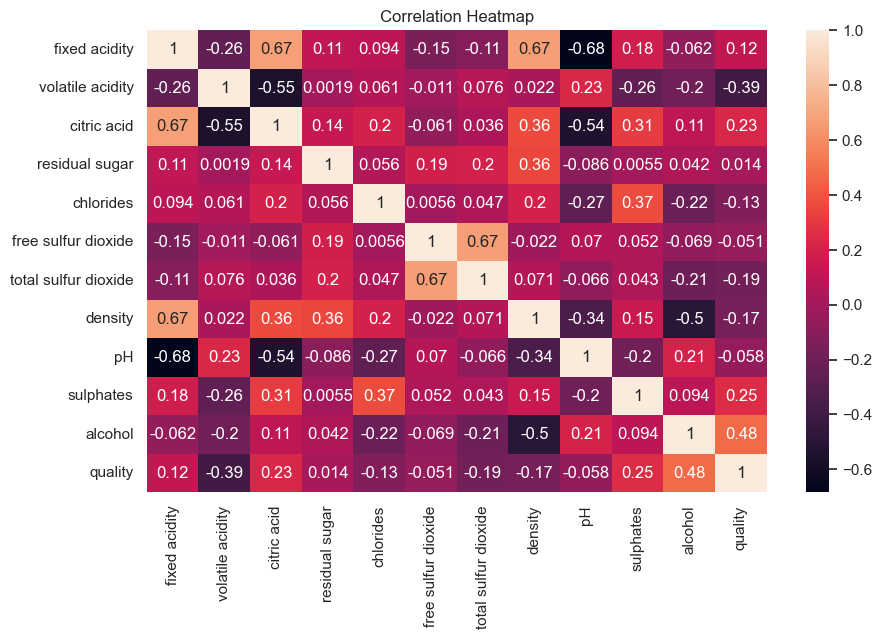

In [40]:
# Calculate the correlation matrix
correlation_matrix = ds.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


### Check the distribution of data using histograms

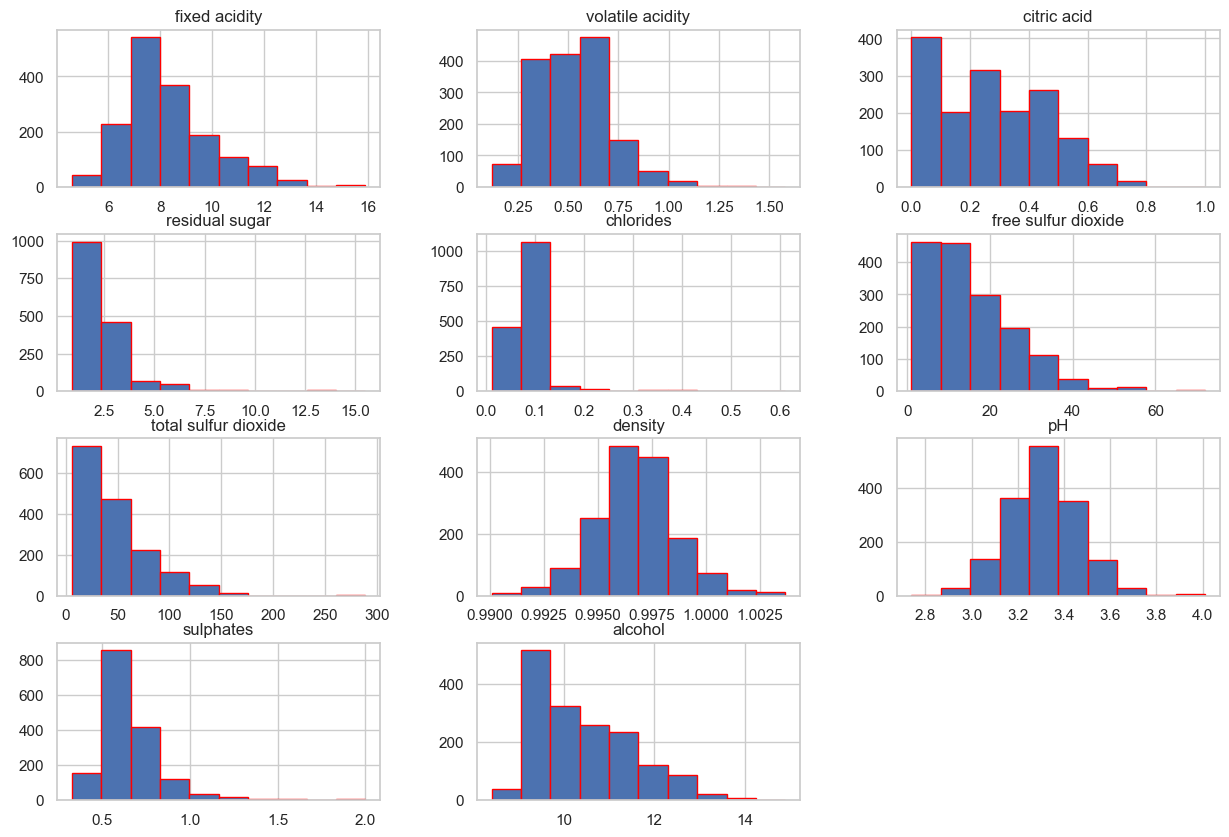

In [41]:
input_variables = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

# Create histograms for each input variable
ds.hist(input_variables , edgecolor = 'red' ,figsize=(15,10))
# display histogram
plt.show()


### Check for outliers if any and handle them

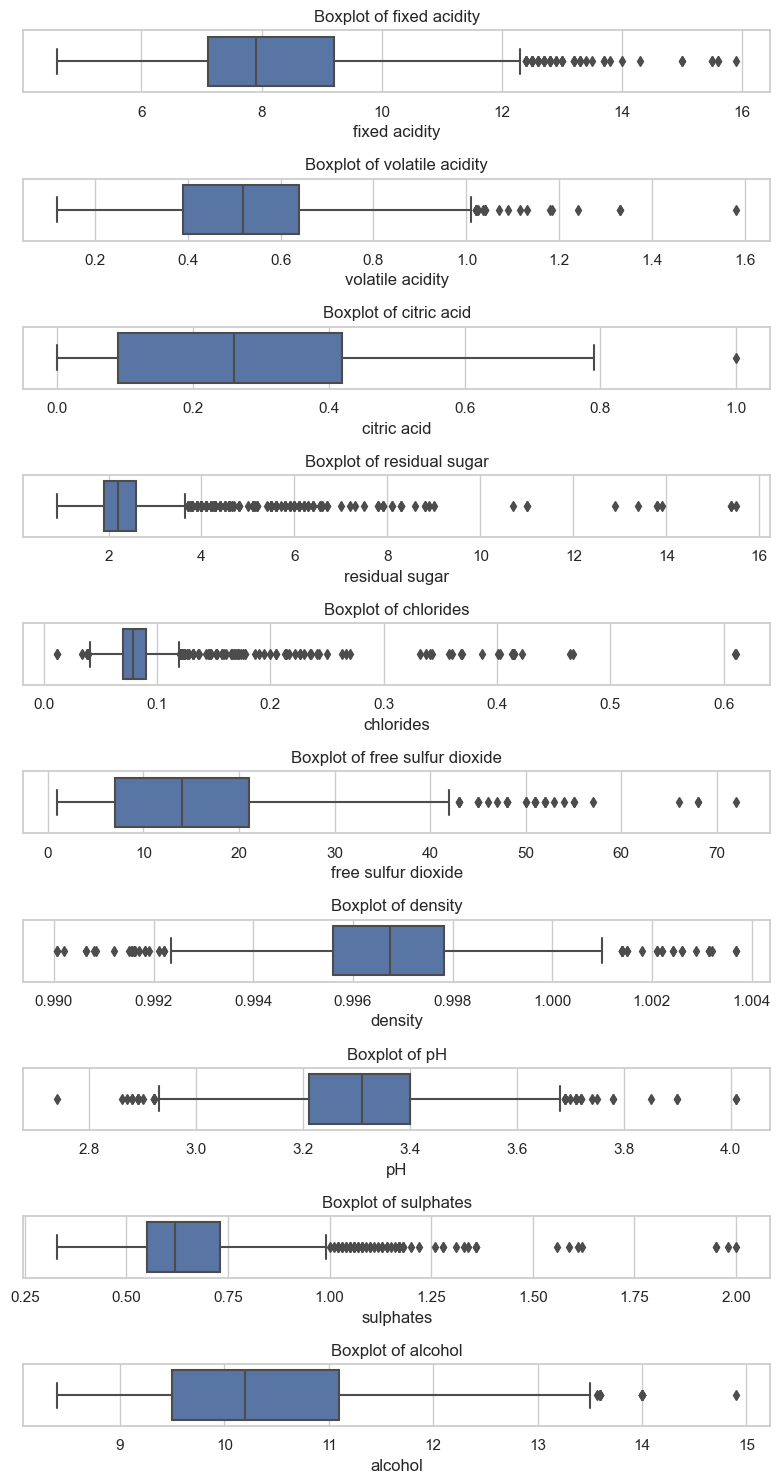

In [42]:
# Before Removing the outliers

# list of columns you want to plot
columns_to_plot = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

# Individual boxplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 15))

# Iterating through the columns to create boxplots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=ds, x=ds[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    
plt.tight_layout()

# Show the plot
plt.show()


In [43]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
# Select numerical features 
anomaly_inputs = ds.select_dtypes(include=['float64'])

# Isolation Forest model using Sklearn Library
model_IsoFor = IsolationForest(contamination=0.05, random_state=42) #the proportion of outliers in the data set is set 0.05 

# Train the Model 
model_IsoFor.fit(anomaly_inputs)

# Predicting outliers (1 for inliers, -1 for outliers)
outlier_predictions = model_IsoFor.predict(anomaly_inputs)

# mask to identify inliers (1 for inliers, 0 for outliers)
inlier_mask = outlier_predictions == 1

# Filtering the dataset to keep only inliers
wine_data_cleaned = ds[inlier_mask]

c:\Users\semal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


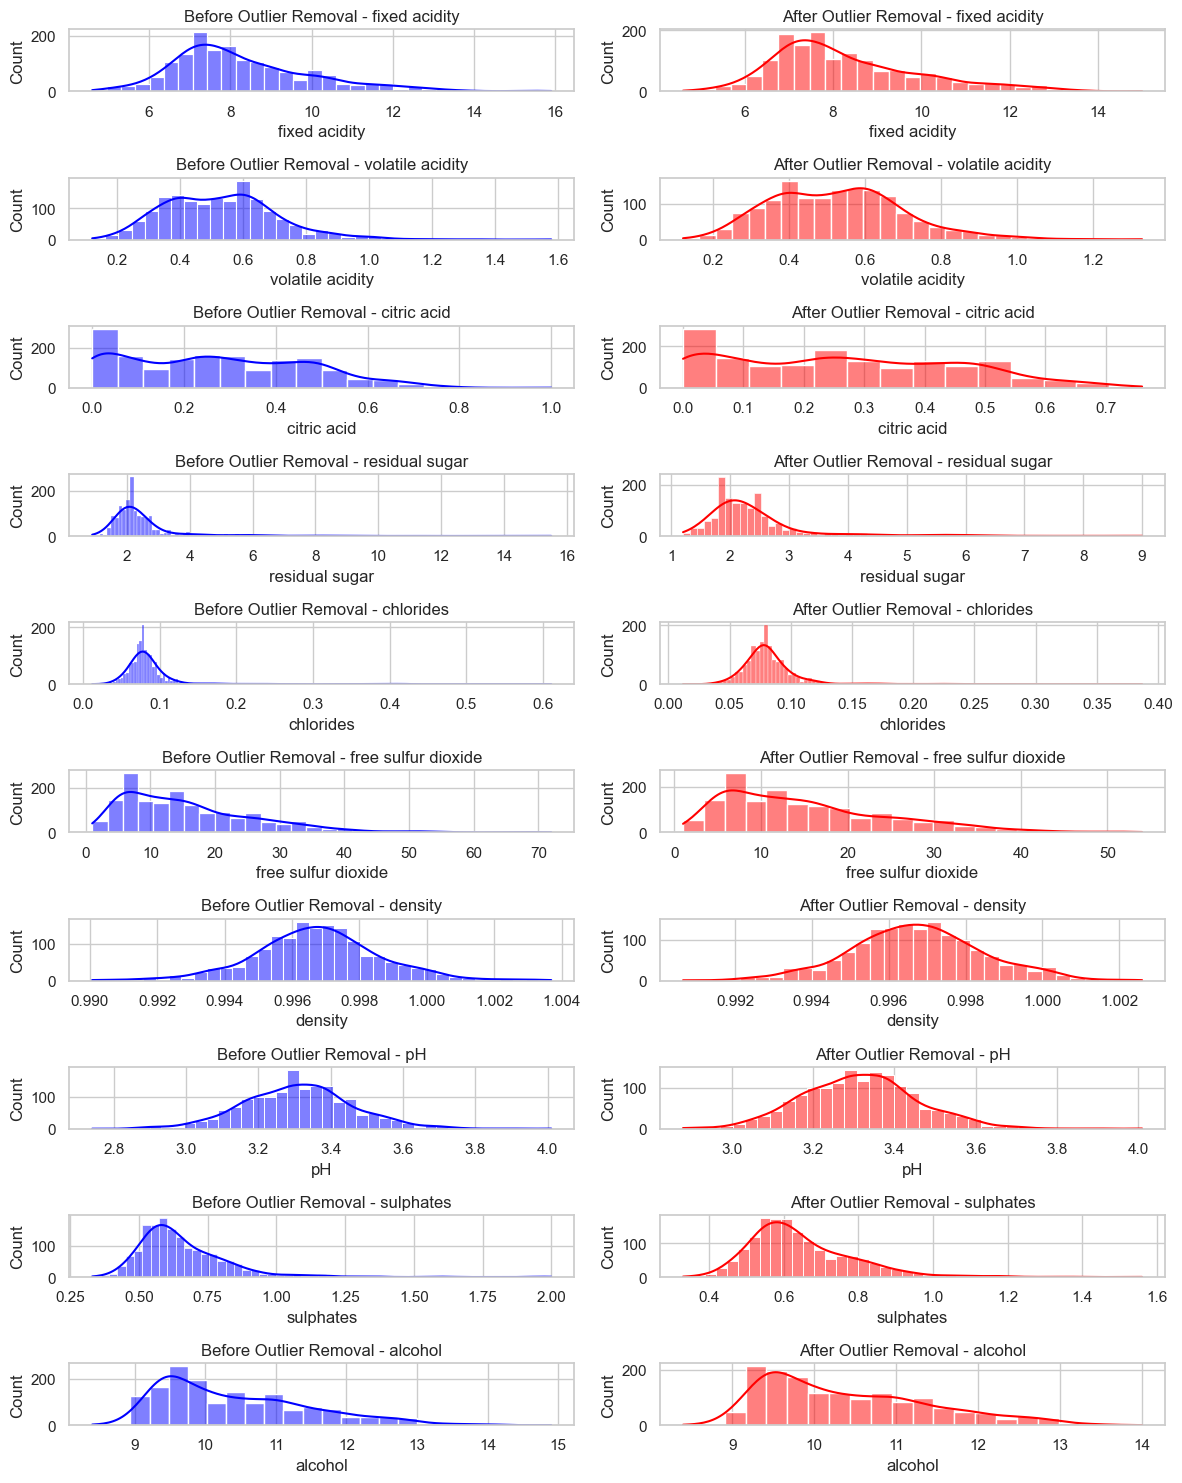

In [45]:
columns_to_plot = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(12, 15))
for i, column in enumerate(columns_to_plot):
    # Plot histograms for the original data (before removal) in the left column
    sns.histplot(data=ds, x=ds[column], ax=axes[i, 0], color='blue', kde=True)
    axes[i, 0].set_title(f"Before Outlier Removal - {column}")
    
    # Plot histograms for the cleaned data (after removal) in the right column
    sns.histplot(data=wine_data_cleaned, x=wine_data_cleaned[column], ax=axes[i, 1], color='red', kde=True)
    axes[i, 1].set_title(f"After Outlier Removal - {column}")
    
plt.tight_layout()
plt.show()

In [46]:
wine_data_cleaned.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
wine_data_cleaned.shape

(1519, 12)

In [48]:
wine_data_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Preprocessing Data for performing Machine learning algorithms

In [49]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data_cleaned['quality'] = pd.cut(wine_data_cleaned['quality'], bins = bins, labels = group_names)

C:\Users\semal\AppData\Local\Temp\ipykernel_5696\1341571400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_cleaned['quality'] = pd.cut(wine_data_cleaned['quality'], bins = bins, labels = group_names)


In [50]:
#assign a labels to quality variable
from sklearn.calibration import LabelEncoder
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
wine_data_cleaned['quality'] = label_quality.fit_transform(wine_data_cleaned['quality'])

C:\Users\semal\AppData\Local\Temp\ipykernel_5696\70485901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_cleaned['quality'] = label_quality.fit_transform(wine_data_cleaned['quality'])


In [51]:
wine_data_cleaned['quality'].value_counts()

0    1313
1     206
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

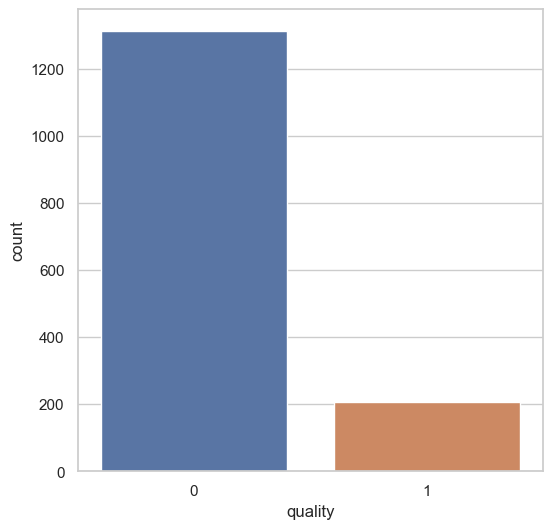

In [52]:
plt.figure(figsize=(6, 6))
sns.countplot(data=wine_data_cleaned, x='quality')

In [53]:
#Seperating the dataset as response variable and feature variabes
X = wine_data_cleaned.drop('quality', axis = 1)
y = wine_data_cleaned['quality']

In [54]:
#Train and Test splitting of data into 80-20 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
# Printing the shape Train and Test Splits
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1215, 11)
Shape of X_test:  (304, 11)
Shape of y_train:  (1215,)
Shape of y_test (304,)


In [56]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Modeling


### Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

#### Linear Regression

In [57]:
# Implementing Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#### Random Forest Regression

In [58]:
# Implementing Random Forest Regression 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

## Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance

In [63]:
# Linear Regression error metrics 
lr_r2 = r2_score(y_test, lr_predict)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predict))
lr_mae = mean_absolute_error(y_test, lr_predict)

print("Linear Regression Metrics:")
print(f"R-squared (R2): {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"MAE: {lr_mae:.4f}")

Linear Regression Metrics:
R-squared (R2): 0.2550
RMSE: 0.2789
MAE: 0.1931


In [64]:
# Random Forest Regression errror metrics
rf_r2 = r2_score(y_test, rf_predict)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predict))
rf_mae = mean_absolute_error(y_test, rf_predict)

print("Random Forest Regression Metrics:")
print(f"R-squared (R2): {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")

Random Forest Regression Metrics:
R-squared (R2): 0.3369
RMSE: 0.2631
MAE: 0.1486


## Compare these 3 metrics for the two models and analyze the performance

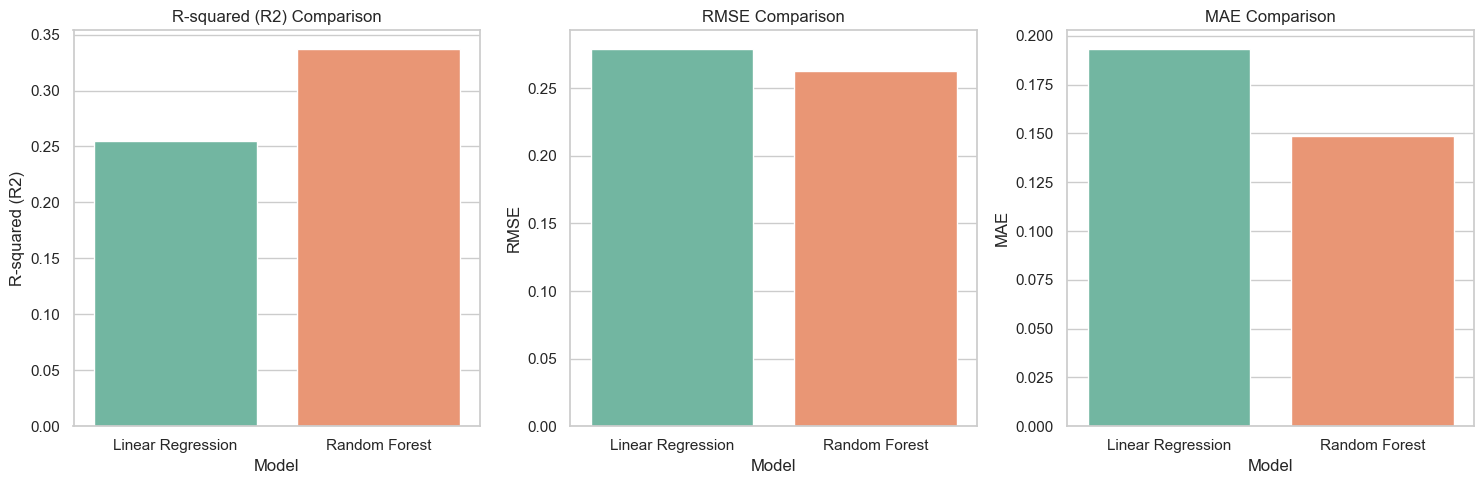

In [61]:
# Metrics for both models
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2, rf_r2]
rmse_values = [lr_rmse, rf_rmse]
mae_values = [lr_mae, rf_mae]

#DataFrame for easy plotting
import pandas as pd
data = pd.DataFrame({
    'Model': models,
    'R-squared (R2)': r2_scores,
    'RMSE': rmse_values,
    'MAE': mae_values
})
sns.set(style="whitegrid")

# subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#R-squared
sns.barplot(x='Model', y='R-squared (R2)', data=data, palette='Set2' ,ax=axes[0])
axes[0].set_title('R-squared (R2) Comparison')

#RMSE
sns.barplot(x='Model', y='RMSE', data=data, palette='Set2', ax=axes[1])
axes[1].set_title('RMSE Comparison')

#MAE
sns.barplot(x='Model', y='MAE', data=data, palette='Set2', ax=axes[2])
axes[2].set_title('MAE Comparison')

plt.tight_layout()
plt.show()


<li>The Random Forest model (0.3369) outperforms the Linear Regression model (0.2550) in terms of explaining the variance in wine quality. This indicates that the Random Forest model better captures the underlying patterns in the data.</li>
<li>The Random Forest model (0.2631) has a lower RMSE compared to the Linear Regression model (0.2789), implying that it provides more accurate predictions on average.</li>
<li>The Random Forest model (0.1486) exhibits a lower MAE compared to the Linear Regression model (0.1931), indicating that it makes predictions with smaller absolute errors on average.</li>

 ## Calculate the feature importance scores for the top features that help predicting wine quality and visualize them

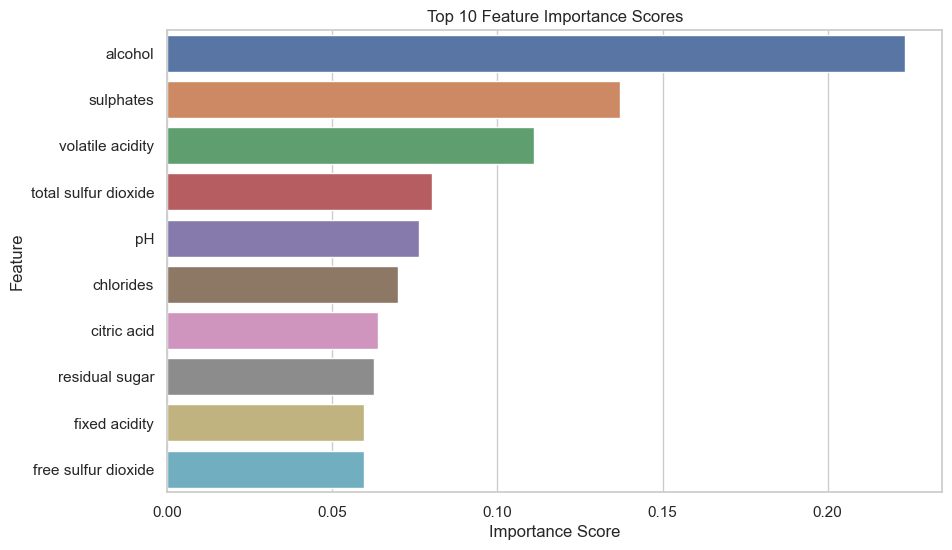

In [62]:
feature_importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_n = 10
top_features = feature_importance_df.head(top_n)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {top_n} Feature Importance Scores')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Conclusion

### Analysis 

<li>Data analysis: Data preprocessing steps such as outlier detection and removal were performed to enhance the quality of the data and improve model performance.</li>
<li>Feature Importance: Feature importance analysis revealed the top features that contributed most significantly to predicting wine quality. This information can be valuable for winemakers and vineyards to understand which physicochemical properties influence wine quality the most.</li>
<li>Model Comparison : The performance of the two regression models was assessed using three key metrics: R-squared, RMSE, and MAE. These metrics provided insights into how well each model fit the data and the accuracy of their predictions.The Random Forest Regression model appears to be a better choice for predicting wine quality in your dataset. However, it's important to consider other factors, such as model complexity and interpretability, when selecting the final model</li>

### Limitations 
<li> The analysis's concentration mainly relies on predictive modeling is one it's major limitation. While quantitative assessments are provided by predictive algorithms, they may not capture all aspects of wine quality, including subjective sensory qualities. Human skills and sensory evaluations are still required for a thorough comprehension of wine quality.</li>

### Future Work
<li>Adding Sensory Data: Addition of sensory evaluation data alongside physicochemical properties can create a more detailed model for wine quality prediction. This mixed approach would combine the objectivity of predictive modeling with human expertise.</li>
<li>Continuous Data Collection : on wine production and quality assessments can enhance ongoing model refinement. The models can be updated with new data to adapt to changing production conditions and consumer preferences and even adjust to inflation.</li>
<li>External Factors: Taking into account external factors, such as environmental conditions and grape varieties , can enhance the models' predictive accuracy and provide a more refined understanding of wine quality.</li>

